# Uber Bookings Analysis

### Done by Adithya B

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv("uber-raw-data-sep14.csv")

In [8]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 


In [10]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [11]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)

In [69]:
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())

In [50]:
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

In [51]:
data

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22


C:\Users\Adithya Balaji\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

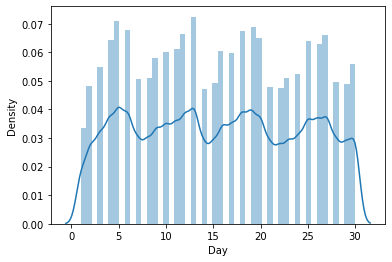

In [22]:
sns.distplot(data['Day'])

C:\Users\Adithya Balaji\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

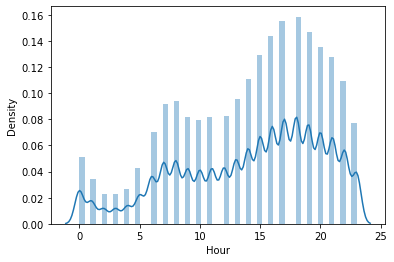

In [24]:
sns.distplot(data['Hour'])
#From the below graph, Uber bookings shoot up after 5am.

C:\Users\Adithya Balaji\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

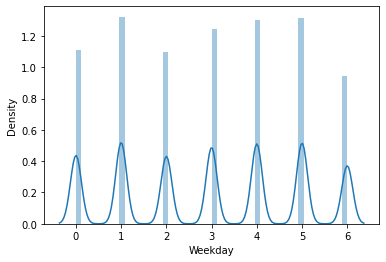

In [26]:
sns.distplot(data['Weekday'])

In [27]:
#From the above plot it is evident that Uber is more Profited On Mondays
#The same can be shown with a pie chart

In [28]:
import plotly.graph_objects as go

In [70]:
data["Weekday"] = data["Weekday"].map({0.0 : "Sunday", 1.0 : "Monday", 2.0 : "Tuesday", 
                               3.0 : "Wednesday", 4.0 :"Thursday", 5.0 :"Friday", 
                               6.0 : "Saturday"})

In [71]:
data

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,Sunday,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,Sunday,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,Sunday,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,Sunday,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,Sunday,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,Monday,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,Monday,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,Monday,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,Monday,22


In [72]:
p=data['Weekday'].value_counts()
x=p.index
y=p.values

In [73]:
fig = go.Figure(data=[go.Pie(labels=x, values=y)])

In [74]:
fig

In [76]:
p

Monday       163230
Friday       162057
Thursday     160380
Wednesday    153276
Sunday       137288
Tuesday      135373
Saturday     116532
Name: Weekday, dtype: int64

In [81]:
p1=data['Hour'].value_counts()
x1=p1.index
y1=p1.values

In [88]:
p1

18    75040
17    73373
19    69660
16    68224
20    63988
15    61219
21    60606
14    52643
22    51817
13    45042
8     44477
7     43314
12    39193
11    38821
9     38542
10    37634
23    36568
6     33307
0     24133
5     20262
1     16107
4     12675
3     10789
2     10702
Name: Hour, dtype: int64

In [82]:
fig1 = go.Figure(data=[go.Pie(labels=x1, values=y1)])

In [86]:
fig1

In [87]:
#From the above chart, we get to know that most of the Ubers are booked at around 6.00pm/18 hrs

In [89]:
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,Sunday,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,Sunday,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,Sunday,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,Sunday,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,Sunday,0


In [91]:
base = data['Base'].value_counts()

In [92]:
base

B02617    377695
B02598    240600
B02682    197138
B02764    178333
B02512     34370
Name: Base, dtype: int64

In [93]:
# B02167 base has the maximum number of bookings in Uber

In [94]:
#Thus the required conclusions are obtained

# THANK YOU!!!